In [112]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [113]:
import pandas as pd

In [114]:
df=pd.read_csv('/content/gdrive/My Drive/updated.csv')

In [115]:
df

,id,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,1,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,2,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,3,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,4,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,5,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal
...,...,...,...,...,...,...,...,...
615,616,80.111572,33.942432,85.101608,46.169139,125.593624,100.292107,Spondylolisthesis
616,617,95.480229,46.550053,59.000000,48.930176,96.683903,77.283072,Spondylolisthesis
617,618,74.094731,18.823727,76.032156,55.271004,128.405731,73.388216,Spondylolisthesis
618,619,87.679087,20.365613,93.822416,67.313473,120.944829,76.730629,Spondylolisthesis


In [116]:
df.shape

(620, 8)

In [117]:
df.columns

Index(['id', 'pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle',
       'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis', 'class'],
      dtype='object')

In [118]:
df.dtypes

id                            int64
pelvic_incidence            float64
pelvic_tilt                 float64
lumbar_lordosis_angle       float64
sacral_slope                float64
pelvic_radius               float64
degree_spondylolisthesis    float64
class                        object
dtype: object

In [119]:
df['class'].value_counts()

Abnormal             210
Normal               200
Spondylolisthesis    150
Hernia                60
Name: class, dtype: int64

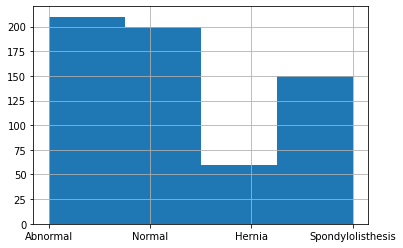

In [120]:
import matplotlib.pyplot as plt
%matplotlib inline 
df['class'].hist(bins=4)

In [121]:
df.corr()

,id,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
id,1.000000,0.108888,0.024701,0.135131,0.121405,-0.050978,0.104298
pelvic_incidence,0.108888,1.000000,0.629199,0.717282,0.814960,-0.247467,0.638743
pelvic_tilt,0.024701,0.629199,1.000000,0.432764,0.062345,0.032668,0.397862
lumbar_lordosis_angle,0.135131,0.717282,0.432764,1.000000,0.598387,-0.080344,0.533667
sacral_slope,0.121405,0.814960,0.062345,0.598387,1.000000,-0.342128,0.523557
pelvic_radius,-0.050978,-0.247467,0.032668,-0.080344,-0.342128,1.000000,-0.026065
degree_spondylolisthesis,0.104298,0.638743,0.397862,0.533667,0.523557,-0.026065,1.000000


In [122]:
import seaborn as sns
corr=df.corr()

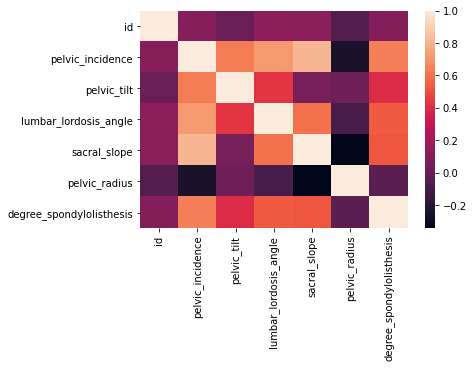

In [123]:
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns)

In [124]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
labenc=LabelEncoder()    #label or indexing of categorical data
df["class"]=labenc.fit_transform(df["class"])   
df

,id,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,1,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0
1,2,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0
2,3,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0
3,4,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0
4,5,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0
...,...,...,...,...,...,...,...,...
615,616,80.111572,33.942432,85.101608,46.169139,125.593624,100.292107,3
616,617,95.480229,46.550053,59.000000,48.930176,96.683903,77.283072,3
617,618,74.094731,18.823727,76.032156,55.271004,128.405731,73.388216,3
618,619,87.679087,20.365613,93.822416,67.313473,120.944829,76.730629,3


In [125]:
df['class'].value_counts()

0    210
2    200
3    150
1     60
Name: class, dtype: int64

In [126]:
x=df.drop(columns = ['class'])
y=df['class']

In [127]:
x

,id,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,1,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400
1,2,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259
2,3,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317
3,4,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523
4,5,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501
...,...,...,...,...,...,...,...
615,616,80.111572,33.942432,85.101608,46.169139,125.593624,100.292107
616,617,95.480229,46.550053,59.000000,48.930176,96.683903,77.283072
617,618,74.094731,18.823727,76.032156,55.271004,128.405731,73.388216
618,619,87.679087,20.365613,93.822416,67.313473,120.944829,76.730629


In [128]:
y

0      0
1      0
2      0
3      0
4      0
      ..
615    3
616    3
617    3
618    3
619    3
Name: class, Length: 620, dtype: int64

In [129]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0) 

In [130]:
#logistic regreesion

In [131]:
from sklearn.linear_model.logistic import LogisticRegression 
lgsr=LogisticRegression(random_state=0) 
lgsr.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [132]:
 y_pred=lgsr.predict(x_test) 
y_pred 

array([2, 1, 1, 2, 2, 1, 2, 2, 2, 0, 0, 3, 2, 1, 0, 3, 1, 0, 2, 2, 2, 1,
       2, 3, 3, 2, 2, 1, 3, 2, 0, 0, 3, 0, 3, 2, 3, 0, 0, 0, 2, 0, 0, 2,
       2, 0, 2, 0, 0, 2, 3, 0, 3, 2, 0, 2, 0, 3, 0, 2, 3, 3, 2, 2, 3, 0,
       1, 1, 0, 1, 2, 3, 2, 0, 2, 2, 3, 2, 0, 0, 3, 3, 0, 0, 0, 3, 2, 2,
       3, 3, 0, 0, 0, 2, 2, 2, 0, 0, 0, 3, 0, 3, 0, 3, 2, 0, 0, 3, 2, 2,
       1, 1, 0, 2, 0, 0, 3, 3, 2, 0, 0, 2, 0, 0])

In [133]:
from sklearn.metrics import confusion_matrix 
conf_matrix=confusion_matrix(y_pred,y_test) 
conf_matrix

array([[44,  0,  0,  0],
       [ 0, 12,  0,  0],
       [ 1,  1, 39,  0],
       [ 0,  0,  0, 27]])

In [134]:
 from sklearn.metrics import accuracy_score 
acc_sco=accuracy_score(y_test,y_pred) 
acc_sco

0.9838709677419355

In [135]:
#naive bayes

In [136]:
import numpy as np
from sklearn.naive_bayes import GaussianNB

In [137]:
clf=GaussianNB()
clf.fit(x_train,y_train)
GaussianNB()
print(clf.predict(x_test))

[2 1 1 2 2 2 2 2 2 0 0 3 2 1 0 3 1 0 2 2 2 1 2 3 3 2 2 1 3 2 0 0 3 0 3 2 3
 0 0 0 2 0 0 2 2 0 2 0 0 2 3 0 3 2 0 2 0 3 0 2 3 3 2 2 3 0 1 1 0 1 2 3 2 0
 2 2 3 0 0 0 3 3 0 0 0 3 2 2 3 3 0 0 0 2 2 3 0 0 0 3 0 3 0 3 2 0 0 3 2 2 2
 1 0 2 0 0 3 3 2 0 0 2 0 0]


In [138]:
y_predict=clf.predict(x_test)
y_predict

array([2, 1, 1, 2, 2, 2, 2, 2, 2, 0, 0, 3, 2, 1, 0, 3, 1, 0, 2, 2, 2, 1,
       2, 3, 3, 2, 2, 1, 3, 2, 0, 0, 3, 0, 3, 2, 3, 0, 0, 0, 2, 0, 0, 2,
       2, 0, 2, 0, 0, 2, 3, 0, 3, 2, 0, 2, 0, 3, 0, 2, 3, 3, 2, 2, 3, 0,
       1, 1, 0, 1, 2, 3, 2, 0, 2, 2, 3, 0, 0, 0, 3, 3, 0, 0, 0, 3, 2, 2,
       3, 3, 0, 0, 0, 2, 2, 3, 0, 0, 0, 3, 0, 3, 0, 3, 2, 0, 0, 3, 2, 2,
       2, 1, 0, 2, 0, 0, 3, 3, 2, 0, 0, 2, 0, 0])

In [139]:
nb_acc=accuracy_score(y_test,y_predict)

In [140]:
nb_acc

0.967741935483871

In [141]:
nb_cm_test=confusion_matrix(y_test,y_predict)
nb_cm_test

array([[45,  0,  0,  0],
       [ 0, 10,  3,  0],
       [ 0,  0, 38,  1],
       [ 0,  0,  0, 27]])

In [142]:
#decision tree

In [143]:
import numpy as np 
import pandas as pd 
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report

In [144]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion='entropy',random_state=0)

In [145]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [146]:
y_pred=dt.predict(x_test)
y_pred

array([2, 1, 1, 2, 2, 1, 2, 2, 2, 0, 0, 3, 2, 1, 0, 3, 1, 0, 2, 2, 2, 1,
       2, 3, 3, 2, 2, 1, 3, 2, 0, 0, 3, 0, 3, 2, 3, 0, 0, 0, 2, 0, 0, 2,
       2, 0, 2, 0, 0, 1, 3, 0, 3, 2, 0, 2, 0, 3, 0, 2, 3, 3, 2, 2, 3, 0,
       1, 1, 0, 1, 2, 3, 2, 0, 2, 2, 3, 0, 0, 0, 3, 3, 0, 0, 0, 3, 2, 2,
       3, 3, 0, 0, 0, 2, 2, 2, 0, 0, 0, 3, 0, 3, 0, 3, 2, 0, 0, 3, 2, 2,
       1, 1, 0, 2, 0, 0, 3, 3, 2, 0, 0, 2, 0, 0])

In [147]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

1.0

In [148]:
from sklearn.ensemble import RandomForestRegressor
Rf=RandomForestRegressor(n_estimators=10,random_state=0,n_jobs=-1)
Rf.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=-1, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [149]:
y_pred=Rf.predict(x_test)
y_pred

array([2., 1., 1., 2., 2., 1., 2., 2., 2., 0., 0., 3., 2., 1., 0., 3., 1.,
       0., 2., 2., 2., 1., 2., 3., 3., 2., 2., 1., 3., 2., 0., 0., 3., 0.,
       3., 2., 3., 0., 0., 0., 2., 0., 0., 2., 2., 0., 2., 0., 0., 1., 3.,
       0., 3., 2., 0., 2., 0., 3., 0., 2., 3., 3., 2., 2., 3., 0., 1., 1.,
       0., 1., 2., 3., 2., 0., 2., 2., 3., 0., 0., 0., 3., 3., 0., 0., 0.,
       3., 2., 2., 3., 3., 0., 0., 0., 2., 2., 2., 0., 0., 0., 3., 0., 3.,
       0., 3., 2., 0., 0., 3., 2., 2., 1., 1., 0., 2., 0., 0., 3., 3., 2.,
       0., 0., 2., 0., 0.])

In [150]:
y_test

389    2
458    1
436    1
367    2
375    2
      ..
75     0
10     0
211    2
157    0
122    0
Name: class, Length: 124, dtype: int64

In [151]:
from sklearn.metrics import r2_score

In [152]:
r2_score(y_test,y_pred)

1.0

In [153]:
#svm

In [154]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler#Feature scaling
from sklearn.pipeline import Pipeline # Pipeline
pipe = Pipeline([
    ('rescale', StandardScaler()),
    ('classifier', SVC(kernel='rbf'))
])


In [155]:
pipe.fit(x_train,y_train)

Pipeline(memory=None,
         steps=[('rescale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('classifier',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='rbf', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [156]:
y_pred=pipe.predict(x_test)
y_pred

array([2, 1, 1, 2, 2, 1, 2, 2, 2, 0, 0, 3, 2, 1, 0, 3, 1, 0, 2, 2, 2, 1,
       2, 3, 3, 2, 2, 1, 3, 2, 0, 0, 3, 0, 3, 2, 3, 0, 0, 0, 2, 0, 0, 2,
       2, 0, 2, 0, 0, 1, 3, 0, 3, 2, 0, 1, 0, 3, 0, 2, 3, 3, 2, 2, 3, 0,
       1, 1, 0, 1, 2, 3, 2, 0, 2, 2, 3, 0, 0, 0, 3, 3, 0, 0, 0, 3, 2, 2,
       3, 3, 0, 0, 0, 2, 2, 2, 0, 0, 0, 3, 0, 3, 0, 3, 2, 0, 0, 3, 2, 2,
       2, 1, 0, 2, 0, 0, 3, 3, 2, 0, 0, 2, 0, 0])

In [157]:
y_test

389    2
458    1
436    1
367    2
375    2
      ..
75     0
10     0
211    2
157    0
122    0
Name: class, Length: 124, dtype: int64

In [158]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9838709677419355

In [159]:
#KNN

In [160]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler#Feature scaling
from sklearn.pipeline import Pipeline # Pipeline
pipe = Pipeline([
    ('rescale', StandardScaler()),
    ('classifier', KNeighborsClassifier())
])

In [161]:
pipe.fit(x_train,y_train)

Pipeline(memory=None,
         steps=[('rescale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('classifier',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=5, p=2,
                                      weights='uniform'))],
         verbose=False)

In [162]:
y_pred=pipe.predict(x_test)
y_pred

array([2, 1, 1, 2, 2, 2, 2, 2, 2, 0, 0, 3, 2, 2, 0, 3, 1, 0, 2, 2, 2, 1,
       2, 3, 3, 2, 2, 1, 3, 2, 2, 0, 3, 0, 3, 2, 3, 0, 0, 0, 2, 0, 0, 2,
       2, 0, 2, 2, 0, 1, 3, 0, 3, 2, 0, 2, 0, 3, 0, 2, 3, 3, 2, 2, 3, 0,
       1, 1, 0, 1, 2, 3, 2, 0, 2, 2, 3, 0, 0, 0, 3, 3, 0, 0, 0, 3, 2, 2,
       3, 3, 0, 0, 0, 2, 2, 3, 0, 0, 0, 3, 0, 3, 0, 3, 2, 0, 0, 3, 2, 2,
       2, 1, 0, 2, 0, 0, 3, 3, 2, 0, 0, 2, 0, 0])

In [163]:
y_test

389    2
458    1
436    1
367    2
375    2
      ..
75     0
10     0
211    2
157    0
122    0
Name: class, Length: 124, dtype: int64

In [164]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)

In [165]:
cm

array([[43,  0,  2,  0],
       [ 0, 10,  3,  0],
       [ 0,  0, 38,  1],
       [ 0,  0,  0, 27]])

In [166]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9516129032258065

In [167]:
import statistics 

In [168]:
model1 = DecisionTreeClassifier()
model2 = KNeighborsClassifier()
model3= LogisticRegression()

model1.fit(x_train,y_train)
model2.fit(x_train,y_train)
model3.fit(x_train,y_train)

pred1=model1.predict(x_test)
pred2=model2.predict(x_test)
pred3=model3.predict(x_test)

final_pred = np.array([])
for i in range(0,len(x_test)):
    final_pred = np.append(final_pred, ([pred1[i], pred2[i], pred3[i]]))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [169]:
final_pred

array([2., 2., 2., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 1., 1.,
       1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 0., 0., 0., 0., 0., 0., 3.,
       3., 3., 2., 2., 2., 1., 1., 1., 0., 0., 0., 3., 3., 3., 1., 1., 1.,
       0., 0., 0., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 1., 1., 2., 2.,
       2., 3., 3., 3., 3., 3., 3., 2., 2., 2., 2., 2., 2., 1., 1., 1., 3.,
       3., 3., 2., 2., 2., 0., 0., 0., 0., 0., 0., 3., 3., 3., 0., 0., 0.,
       3., 3., 3., 2., 2., 2., 3., 3., 3., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 2., 2., 2., 0., 0., 0., 0., 0., 0., 2., 2., 2., 2., 2., 2., 0.,
       0., 0., 2., 2., 2., 0., 0., 0., 0., 0., 0., 1., 1., 2., 3., 3., 3.,
       0., 0., 0., 3., 3., 3., 2., 2., 2., 0., 0., 0., 2., 2., 2., 0., 0.,
       0., 3., 3., 3., 0., 0., 0., 2., 2., 2., 3., 3., 3., 3., 3., 3., 2.,
       2., 2., 2., 2., 2., 3., 3., 3., 0., 0., 0., 1., 1., 1., 1., 1., 1.,
       0., 0., 0., 1., 1., 1., 2., 2., 2., 3., 3., 3., 2., 2., 2., 0., 0.,
       0., 2., 2., 2., 2.

In [170]:
#Bagging

In [171]:
#Bagging meta-estimator

In [172]:
from sklearn.ensemble import BaggingClassifier
from sklearn import tree
model = BaggingClassifier(tree.DecisionTreeClassifier(random_state=1))
model.fit(x_train, y_train)
model.score(x_test,y_test)

1.0

In [173]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [174]:
#random forest bagging

In [175]:
model = RandomForestClassifier()

In [176]:
# fit the model with the training data
model.fit(x_train,y_train)

# number of trees used
print('Number of Trees used : ', model.n_estimators)

# predict the target on the train dataset
predict_train = model.predict(x_train)
print('\nTarget on train data',predict_train) 

# Accuray Score on train dataset
accuracy_train = accuracy_score(y_train,predict_train)
print('\naccuracy_score on train dataset : ', accuracy_train)

# predict the target on the test dataset
predict_test = model.predict(x_test)
print('\nTarget on test data',predict_test) 

# Accuracy Score on test dataset
accuracy_test = accuracy_score(y_test,predict_test)
print('\naccuracy_score on test dataset : ', accuracy_test)

Number of Trees used :  100

Target on train data [3 2 2 2 2 1 0 3 2 0 3 3 1 3 2 3 2 0 2 0 3 2 0 1 1 1 2 0 3 3 0 0 3 2 2 0 3
 3 2 2 0 2 2 0 2 0 2 0 1 0 2 3 2 2 1 2 0 0 3 3 0 2 2 2 1 1 1 2 0 2 3 3 0 2
 1 2 3 2 2 0 3 0 3 0 0 0 2 3 3 3 0 3 2 2 0 2 2 2 1 3 0 0 2 0 3 0 0 3 0 0 3
 1 2 3 2 2 3 1 0 2 3 0 2 3 0 3 2 3 3 2 0 1 0 0 0 0 0 2 1 3 0 0 2 2 2 2 3 0
 2 2 0 0 3 2 2 3 0 0 0 0 2 3 2 0 0 2 2 2 0 2 0 3 1 3 2 0 0 3 0 2 3 0 2 2 3
 3 2 2 3 0 0 3 1 3 3 3 0 3 2 2 1 1 0 0 0 3 3 0 0 3 0 0 2 3 2 3 1 0 3 3 1 3
 0 0 0 0 2 3 1 2 2 2 0 0 2 2 3 0 2 2 3 3 0 2 3 3 3 0 3 2 0 2 1 3 3 3 1 0 3
 2 2 1 2 3 3 2 2 0 0 0 2 0 2 2 0 0 3 2 3 1 1 2 2 2 3 2 2 0 2 2 0 3 0 3 3 3
 2 3 2 0 2 1 0 0 1 3 0 2 0 3 3 3 2 3 0 2 3 0 2 2 0 0 2 2 2 3 2 0 2 0 0 2 0
 1 0 2 3 0 3 3 2 0 2 2 0 2 2 1 2 0 0 1 0 2 3 3 1 0 0 0 1 0 0 3 2 0 3 1 3 0
 2 1 2 2 2 2 3 2 3 2 1 1 3 3 0 2 2 3 2 2 0 2 2 3 1 0 2 3 2 3 0 0 0 2 0 0 0
 0 0 0 1 0 0 0 0 2 0 0 3 2 3 2 0 2 2 2 2 0 0 3 0 2 2 2 0 0 0 0 2 0 0 2 0 0
 1 0 2 0 2 2 3 1 0 2 2 2 3 3 0 3 0 0 0 1 3 0 2 3 3

In [177]:
#boosting

In [178]:
#ADABOOST

In [179]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(random_state=1)
model.fit(x_train, y_train)
model.score(x_test,y_test)

0.8951612903225806

In [180]:
#GRADIENTBOSTING

In [181]:
from sklearn.ensemble import GradientBoostingClassifier
model= GradientBoostingClassifier(learning_rate=0.01,random_state=1)
model.fit(x_train, y_train)
model.score(x_test,y_test)

1.0

In [182]:
#XGBOOST

In [183]:
import xgboost as xgb
model=xgb.XGBClassifier(random_state=1,learning_rate=0.01)
model.fit(x_train, y_train)
model.score(x_test,y_test)

1.0

In [184]:
#LIGHTGBM

In [185]:
import lightgbm as lgb
train_data=lgb.Dataset(x_train,label=y_train)
#define parameters
params = {'learning_rate':0.001}
model= lgb.train(params, train_data, 100) 
y_pred=model.predict(x_test)
for i in range(0,185):
  if y_pred[i]>=0.5: 
    y_pred[i]=1
  else: 
    y_pred[i]=0

IndexError: ignored

In [186]:
y_pred

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.])

In [187]:
#CATBOOST

In [188]:
!pip3 install catboost